In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

import matplotlib as mpl 

import matplotlib.pyplot as plt 

%matplotlib inline

#Create Russian Data Frame using Read_CSV
dfRussianData = pd.read_csv('C:/Users/hp/Desktop/SMU/Data Mining/Project/Data/train.csv') # read in the csv file
dfRussianData['price_doc_log'] = np.log1p(dfRussianData['price_doc']) # make column of ln(price_doc + 1)

In [2]:
#Show headers and first 10 records of the data set 
dfRussianData.head(10)



,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_doc_log
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4,0,13,22,1,0,52,4,5850000,15.581952
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,3,0,15,29,1,10,66,14,6000000,15.607270
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,27,0,4,67,10,5700000,15.555977
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,2,1,4,4,0,0,26,3,13100000,16.388123
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,108,17,135,236,2,91,195,14,16331452,16.608603
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,14,1,53,78,1,20,113,17,9100000,16.023785
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,16,3,38,80,1,27,127,8,5500000,15.520259
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,4,0,11,18,1,0,47,4,2000000,14.508658
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,8,1,18,34,1,3,85,11,5300000,15.483218
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,13,0,10,20,1,3,67,1,2000000,14.508658


In [3]:
#Get specific column data types
#This is only the first 15 columns as the data set contains 292 total columns
#dfRussianData.info(15)

#Look to see if there are any missing values in data frame
dfRussianData.isnull().values.any()

True

In [4]:
#Find all columns with missing data 
MissingRussianData = dfRussianData.isnull().sum()

#Remove all Columns with a value equal to 0 and short data
MissingRussianData = MissingRussianData.drop(MissingRussianData[MissingRussianData == 0].index).sort_values(ascending=False)

#Remove Null values that are created by import
df = dfRussianData.replace(to_replace='nan',value= np.nan) 

#Descriptive stats for Russian Dat set
df.describe() 

#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_doc_log
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06,15.609483
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06,0.604574
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,11.512935
25%,7620.500000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06,15.371548
50%,15238.000000,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06,15.651990
75%,22855.500000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06,15.931766
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08,18.526041


In [5]:
# and fill in the null values for the columns that have missing values 
dfRussianDataUpdated = df.fillna(df.median()) 

#Show top 15 column data types
dfRussianDataUpdated.describe()


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_doc_log
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000
mean,15237.917397,54.214269,33.480883,7.664386,12.383381,1.567293,2.581804e+03,1.938138,6.273867,2.059401,...,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06,15.609483
std,8796.501536,38.031487,46.522251,5.306094,5.601542,1.285318,1.148616e+05,0.706675,23.409589,0.657852,...,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06,0.604574
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,11.512935
25%,7620.500000,38.000000,22.000000,3.000000,9.000000,1.000000,1.976000e+03,2.000000,5.000000,2.000000,...,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06,15.371548
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06,15.651990
75%,22855.500000,63.000000,38.000000,11.000000,16.000000,1.000000,1.983000e+03,2.000000,8.000000,2.000000,...,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06,15.931766
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08,18.526041


In [6]:
dfRussianDataUpdated['build_year'].describe()

count    3.047100e+04
mean     2.581804e+03
std      1.148616e+05
min      0.000000e+00
25%      1.976000e+03
50%      1.979000e+03
75%      1.983000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [7]:
#Find the median value from the original data set 
buildYearMedian = df['build_year'].median()

#Find the number of homes that have a build year of 0 or a value greater than 2018
dfRussianDataUpdated.loc[dfRussianDataUpdated['build_year'] == 0, 'build_year'] = buildYearMedian
dfRussianDataUpdated.loc[dfRussianDataUpdated['build_year'] > 2018, 'build_year'] = buildYearMedian

dfRussianDataUpdated['build_year'].describe()

count    30471.000000
mean      1958.124118
std        218.341256
min          1.000000
25%       1978.000000
50%       1979.000000
75%       1983.000000
max       2018.000000
Name: build_year, dtype: float64

In [8]:
dfRussianDataUpdated['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [9]:
dfRussianData['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [10]:
dfRussianData['price_doc_log'].describe()

count    30471.000000
mean        15.609483
std          0.604574
min         11.512935
25%         15.371548
50%         15.651990
75%         15.931766
max         18.526041
Name: price_doc_log, dtype: float64

In [11]:
print(dfRussianData.loc[dfRussianData['state'] == 33, 'state'])

10089    33.0
Name: state, dtype: float64


In [12]:
dfRussianDataUpdated['state'].describe()

count    30471.000000
mean         2.059401
std          0.657852
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         33.000000
Name: state, dtype: float64

Seems to be a high value of 33. Let's take a closer look with a plot.

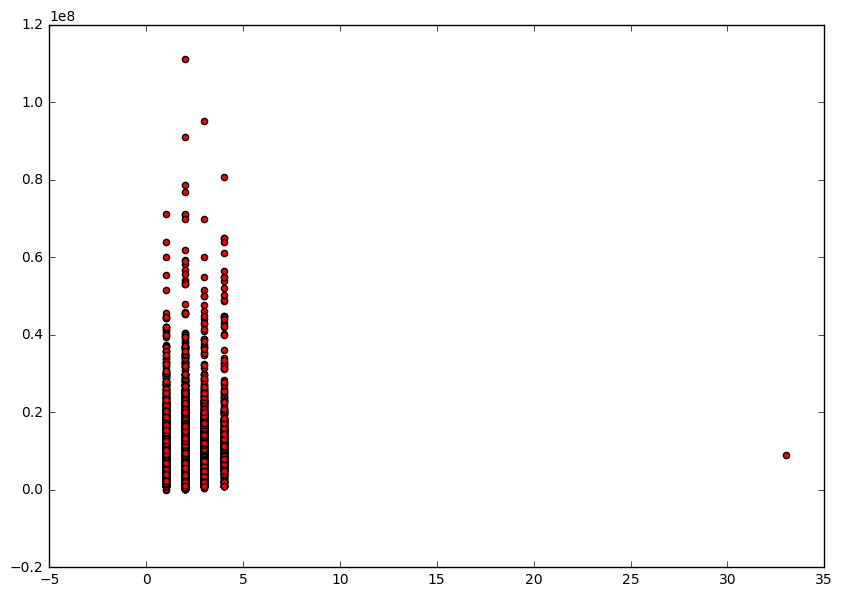

In [14]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['state'], y=dfRussianDataUpdated['price_doc'], c='r')

One of the 'state' values is very high. Replace it with the median value of 2.

In [15]:
dfRussianDataUpdated.loc[dfRussianDataUpdated['state'] == 33, 'state'] = dfRussianDataUpdated['state'].median()

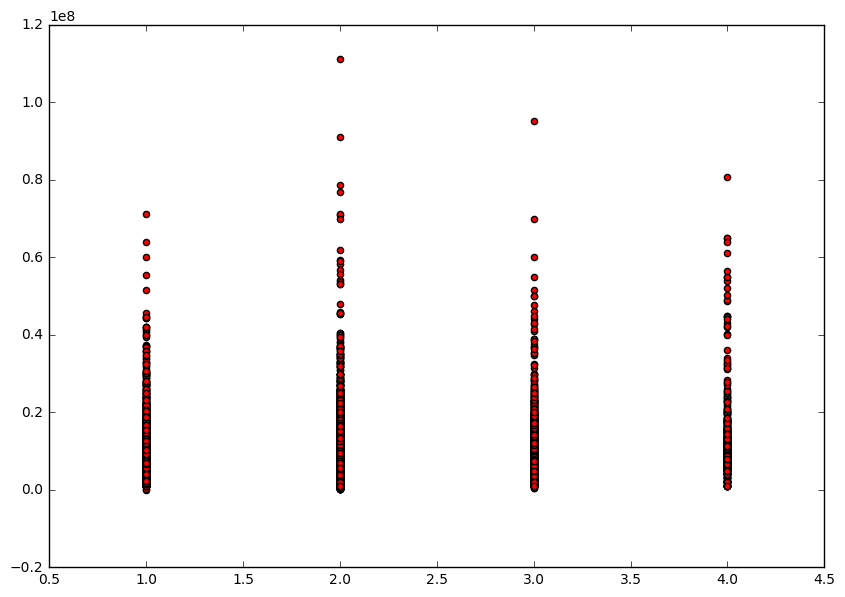

In [16]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['state'], y=dfRussianDataUpdated['price_doc'], c='r')

In [17]:
dfRussianDataUpdated['state'].describe()

count    30471.000000
mean         2.058383
std          0.633522
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: state, dtype: float64

In [18]:
dfRussianDataUpdated['full_sq'].describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

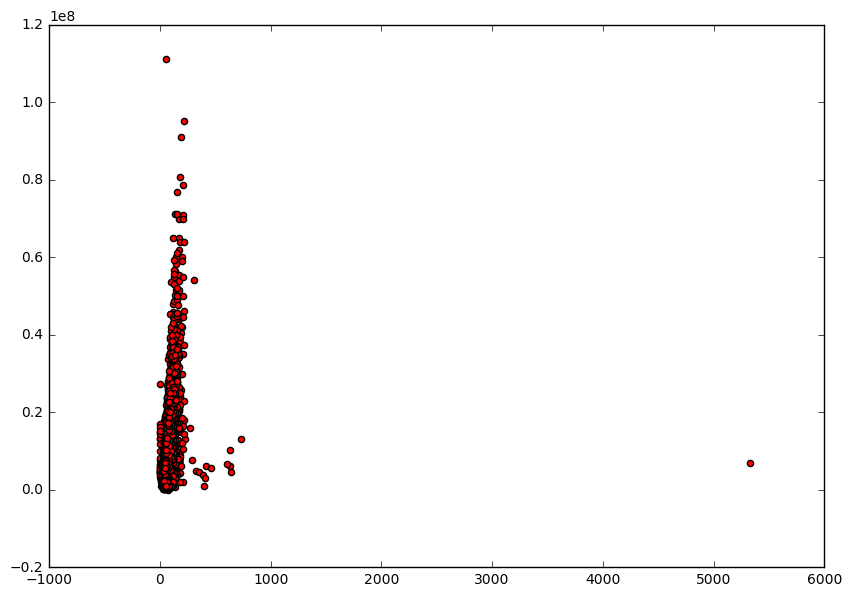

In [19]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['full_sq'], y=dfRussianDataUpdated['price_doc'], c='r')

Two values of the 'full_sq' seem too high. Replace the highest with the median.

In [20]:
dfRussianDataUpdated.loc[dfRussianDataUpdated['full_sq'] == 5326, 'full_sq'] = dfRussianDataUpdated['full_sq'].median()

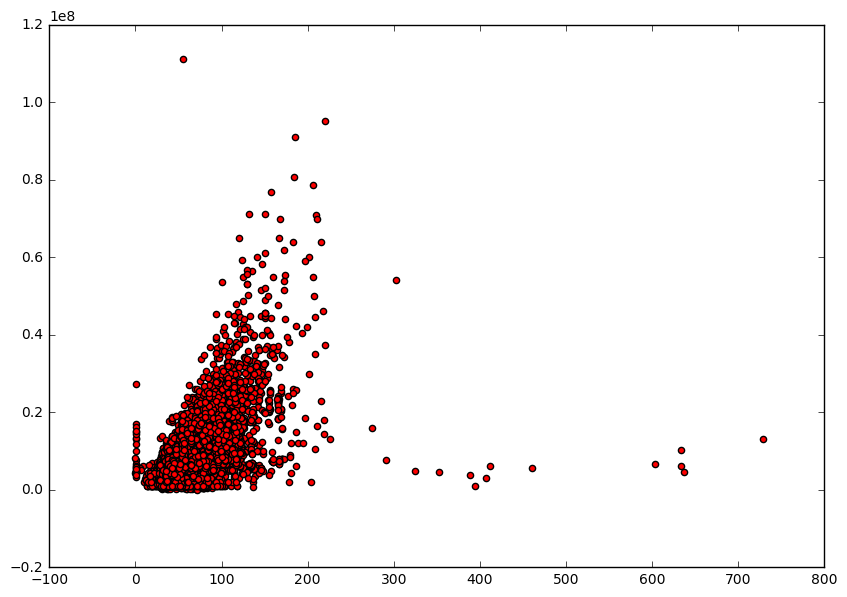

In [21]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['full_sq'], y=dfRussianDataUpdated['price_doc'], c='r')

In [22]:
dfRussianDataUpdated['full_sq'].describe()

count    30471.000000
mean        54.041088
std         23.114145
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max        729.000000
Name: full_sq, dtype: float64

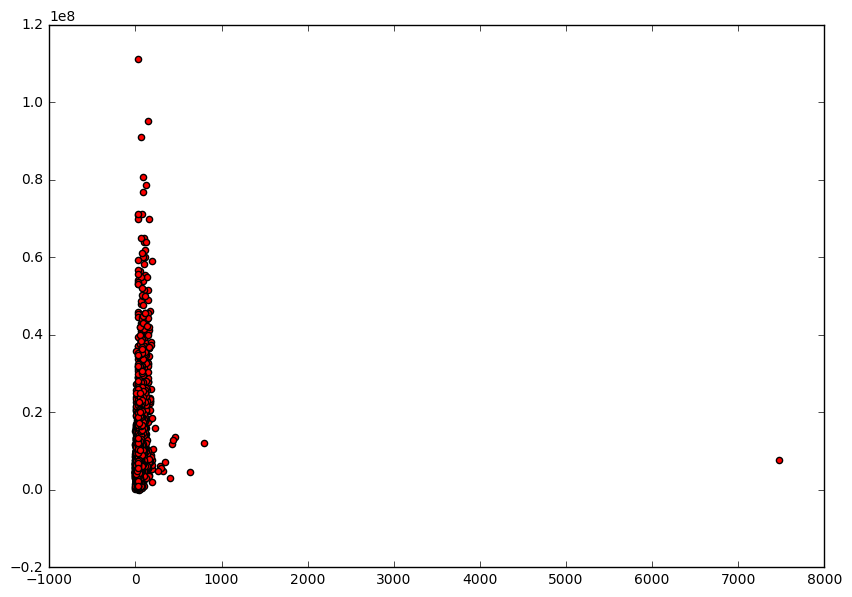

In [24]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['life_sq'], y=dfRussianDataUpdated['price_doc'], c='r')

In [25]:
dfRussianDataUpdated['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

In [26]:
dfRussianDataUpdated.loc[dfRussianDataUpdated['life_sq'] == 7478, 'life_sq'] = dfRussianDataUpdated['life_sq'].median()

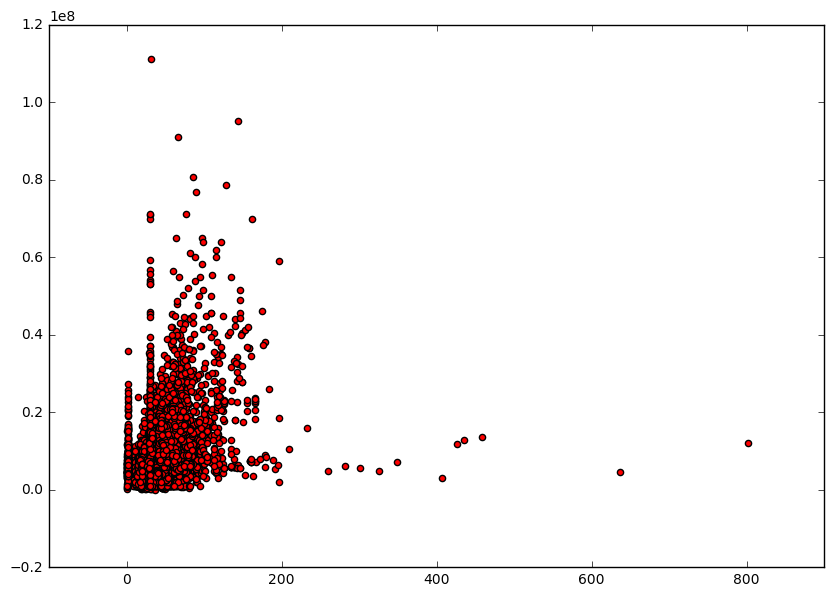

In [27]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['life_sq'], y=dfRussianDataUpdated['price_doc'], c='r')

In [28]:
dfRussianDataUpdated['life_sq'].describe()

count    30471.000000
mean        33.236454
std         18.584775
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max        802.000000
Name: life_sq, dtype: float64

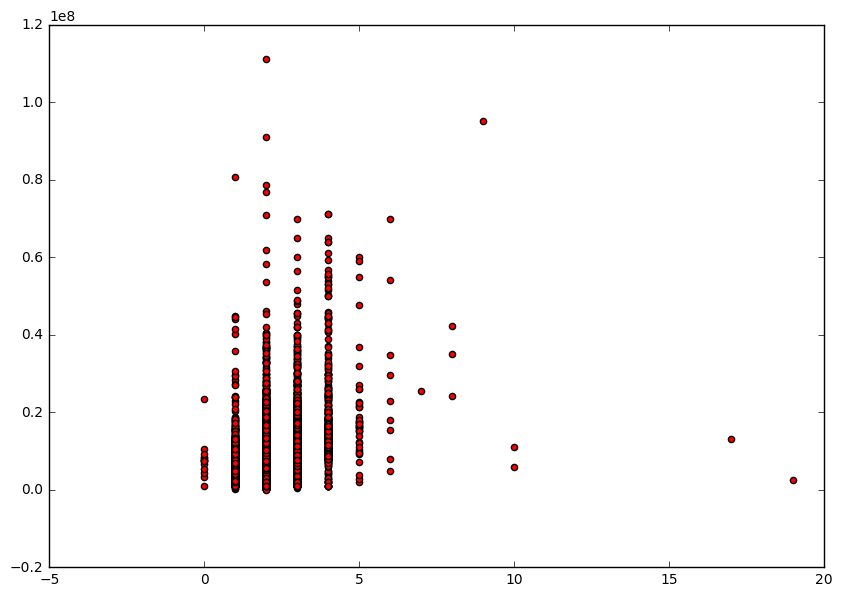

In [29]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=dfRussianDataUpdated['num_room'], y=dfRussianDataUpdated['price_doc'], c='r')